In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

mu = 0.05 # rf
n = 1000 # timesteps
T = 1 # years until expiration
S0 = 100 # initial stock price
K = 100 # strike price
sigma = 0.2 # Vol 
M = 1000 # # of simulations

In [2]:
def BSM_CALL(S, K, T, r, sigma):
 d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
 d2 = d1 - sigma * np.sqrt(T)
 return S * norm.cdf(d1) - K * np.exp(-r*T)* norm.cdf(d2)

In [3]:
times = np.linspace(0, T, num = n+1) # generate times
dt = times[1] - times[0] # discrete timestep 

B = np.random.normal(0, np.sqrt(dt), size=(M,n)).T # Random noise in GBM
St = np.exp( (mu - sigma ** 2 / 2) * dt + sigma * B ) # Simulated price returns

In [4]:
St = np.vstack([np.ones(M), St]) # Add a row of ones above

In [5]:
St = S0 * St.cumprod(axis=0)
ExpPayoffT = (1 / M) * np.sum(np.maximum(St[n] - K, 0)) # Get option value at the excersize date
DiscExpPayoffT = ExpPayoffT * np.exp(-mu * T) # discount option by rf

In [6]:
tt = np.full(shape=(M,n+1), fill_value=times).T

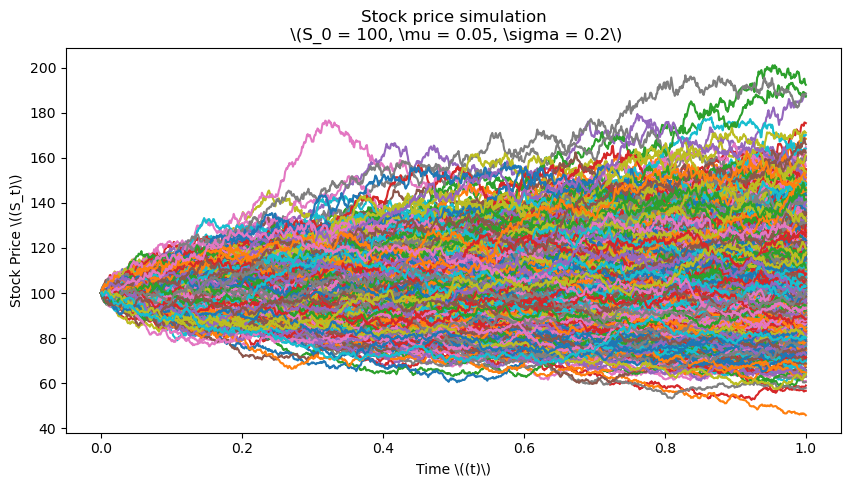

Expected payoff in T=1 years: 11.638726596223945
Discounted Expected payoff: 11.071099202047257
BSM price: 10.450583572185565


In [7]:
plt.figure(figsize = (10,5))
plt.plot(tt, St)
plt.xlabel("Time \((t)\)")
plt.ylabel("Stock Price \((S_t)\)")
plt.title("Stock price simulation\n \(S_0 = {0}, \mu = {1}, \sigma = {2}\)".format(S0, mu, sigma))
plt.show()
print("Expected payoff in T={0} years: {1}".format(T,ExpPayoffT))
print("Discounted Expected payoff: {0}".format(DiscExpPayoffT))
print("BSM price: {0}".format(BSM_CALL(S0, K, T, mu, sigma)))